In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from google.colab import drive
import cv2
import os
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/surya/ML_Assignment/gurmukhi/')
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


Mounted at /content/drive


In [ ]:
def load_images_from_directory(image_directory, image_size):
    images = []
    labels = []

    for label, class_folder in enumerate(os.listdir(image_directory)):
        class_path = os.path.join(image_directory, class_folder)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, image_size)
            images.append(resized_image)
            labels.append(label)

    images = np.array(images)/255.0  # Normalize pixel values
    labels = np.array(labels)

    return images, labels

In [ ]:
train_directory = '/content/drive/My Drive/surya/ML_Assignment/gurmukhi/train/'
val_directory = '/content/drive/My Drive/surya/ML_Assignment/gurmukhi/val/'
image_size=(64,64)


In [ ]:
X_train, y_train = load_images_from_directory(train_directory, image_size)
X_val, y_val = load_images_from_directory(val_directory, image_size)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape

(1000, 64, 64, 3)

In [ ]:
X_train[200]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
X_train.shape

(1000, 64, 64, 3)

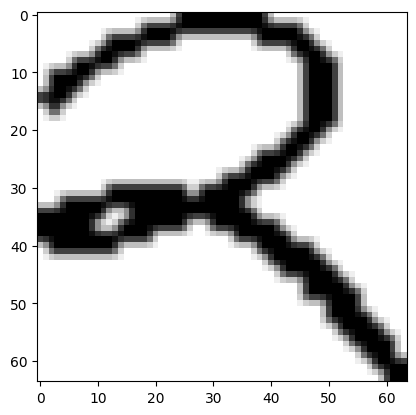

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[200])

In [ ]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_val.reshape(X_val.shape[0], -1)


In [ ]:
X_train_flattened.shape

(1000, 12288)

In [ ]:
X_train_flattened[0]


array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
num_classes = 10  # Assuming you have 10 classes for digits 0-9


In [ ]:
# Create the neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_flattened.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [4]:
# model = keras.Sequential([
#     keras.layers.Dense(10, input_shape=(12288,), activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train_flattened, y_train, epochs=5)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_flattened, y_train, epochs=24, validation_data=(X_test_flattened, y_val))


NameError: ignored

In [ ]:
model.evaluate(X_test_flattened, y_val)

6/6 [==============================] - 0s 13ms/step - loss: 1.0902 - accuracy: 0.6517


[1.0901823043823242, 0.6516854166984558]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]


6/6 [==============================] - 0s 15ms/step


array([9.9991101e-01, 3.0160647e-06, 1.9767397e-07, 1.1075280e-06,
       2.0235832e-06, 2.9863542e-05, 1.8408557e-05, 5.4796005e-06,
       1.4262453e-05, 1.4621286e-05], dtype=float32)

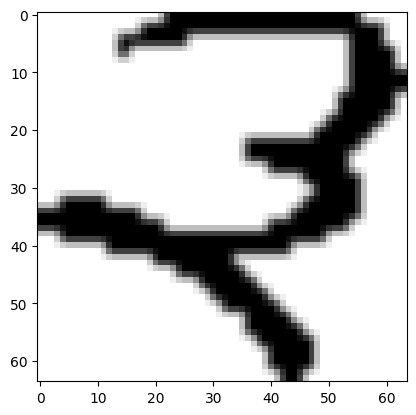

In [ ]:
plt.imshow(X=X_val[56])

In [ ]:
np.argmax(y_predicted[60])


3

In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(X_test_flattened, y_val)

print(f"Validation accuracy: {accuracy * 100:.2f}%")


6/6 [==============================] - 0s 14ms/step - loss: 1.0902 - accuracy: 0.6517
Validation accuracy: 65.17%


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [ ]:
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  1, 14,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 12,  2,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2, 14,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  5,  0,  0,  9]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

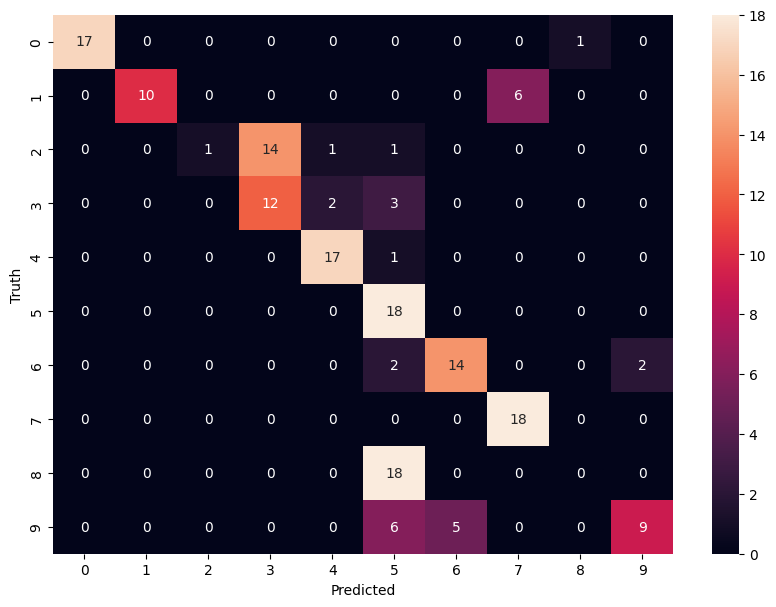

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
